In [2]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

2023-12-04 15:06:45.698345: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 15:06:45.904568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 15:06:45.904637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 15:06:45.944946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 15:06:46.029568: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 15:06:46.030509: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
!pip install resampy==0.2.2

In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:


TESS = "Datasets/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "Datasets/RAVDESS/audio_speech_actors_01-24/"


In [6]:
import os
import pandas as pd

#RAV = 'your_directory_path_here'  # Replace with the actual path to your directory

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
path = []

for i in dir_list:
    fname = os.listdir(os.path.join(RAV, i))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        path.append(os.path.join(RAV, i, f))

RAV_df = pd.DataFrame(emotion, columns=['emotion'])
RAV_df['emotion'] = RAV_df['emotion'].replace({
    1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
})

RAV_df['labels'] = RAV_df['emotion']
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df, pd.DataFrame(path, columns=['path'])], axis=1)
RAV_df = RAV_df.drop(['emotion'], axis=1)

print(RAV_df['labels'].value_counts())


labels
neutral     288
surprise    192
fear        192
sad         192
disgust     192
happy       192
angry       192
Name: count, dtype: int64


In [7]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))


# Lets play the audio
ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [8]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
#librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio
ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [9]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [10]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: count, dtype: int64

In [11]:
# lets play a fearful track
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))

ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [12]:
# lets play a happy track
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))

ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [13]:
EmotionData = pd.concat([RAV_df, TESS_df], axis = 0)
print(EmotionData.labels.value_counts())
#EmotionData.head()
EmotionData.to_csv("Data_path.csv",index=False)

labels
neutral     688
surprise    592
fear        592
sad         592
disgust     592
happy       592
angry       592
Name: count, dtype: int64


In [14]:
EmotionData.tail()

,labels,source,path
2795,sad,TESS,Datasets/TESS/tess toronto emotional speech se...
2796,sad,TESS,Datasets/TESS/tess toronto emotional speech se...
2797,sad,TESS,Datasets/TESS/tess toronto emotional speech se...
2798,sad,TESS,Datasets/TESS/tess toronto emotional speech se...
2799,sad,TESS,Datasets/TESS/tess toronto emotional speech se...


In [15]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

,labels,source,path
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...


In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


Lets extract MFCC feature for one of the example voice

In [17]:
# # Source - RAVDESS; Gender - Male; Emotion - Happy
# path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-02-01-01-01-11.wav"
# X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
# mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# # audio wave
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# #librosa.display.waveplot(X, sr=sample_rate)
# plt.title('Audio sampled at 44100 hrz')

# # MFCC
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# #Here we are displaying Spectrogram for the Happy voice and lets visualiza how its look like
# librosa.display.specshow(mfcc, x_axis='time')
# plt.ylabel('MFCC')
# plt.colorbar()

# ipd.Audio(path)

Now lets extract this feature for entire dataset and then concatinate this feature column into our dataframe

In [18]:
import resampy
import librosa
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter = 0

# Use tqdm to display a progress bar
for index, path in tqdm(enumerate(ref.path), total=len(ref.path), desc="Processing Audio Files"):
    X, sample_rate = librosa.load(path,
                                  res_type='kaiser_fast',
                                  duration=2.5,
                                  sr=44100,
                                  offset=0.5)

    sample_rate = np.array(sample_rate)

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                         sr=sample_rate,
                                         n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter = counter + 1

# Check a few records to make sure it's processed successfully
print(len(df))
df.head()


Processing Audio Files: 100%|███████████████| 4240/4240 [01:59<00:00, 35.45it/s]

4240


,feature
0,"[-70.74651, -70.74651, -70.02528, -69.13127, -..."
1,"[-64.51157, -64.51157, -64.51157, -64.51157, -..."
2,"[-45.62977, -45.374794, -45.19532, -43.043472,..."
3,"[-70.22963, -70.22963, -70.22963, -70.22963, -..."
4,"[-68.04908, -68.04908, -68.04908, -68.04908, -..."


In [19]:
#concatinating the feature column into the complete dataframe
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,...,-30.967125,-32.430031,-32.474728,-34.334450,-38.280952,-39.110352,-41.010277,-40.282722,-41.446358,-46.433792
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,...,-61.820129,-63.520226,-64.511574,-64.511574,-64.511574,-64.463341,-64.511574,-64.511574,-64.511574,-64.511574
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-45.629768,-45.374794,-45.195320,-43.043472,-43.082603,-44.332863,-44.626202,...,-26.977255,-29.308031,-26.958963,-26.997744,-27.167728,-26.274006,-26.835957,-26.284428,-16.259249,-9.221558
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-66.133575,-62.637356,-66.394379,-70.229630,-70.229630
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080


In [20]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(4240, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,...,-30.967125,-32.430031,-32.474728,-34.334450,-38.280952,-39.110352,-41.010277,-40.282722,-41.446358,-46.433792
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,...,-61.820129,-63.520226,-64.511574,-64.511574,-64.511574,-64.463341,-64.511574,-64.511574,-64.511574,-64.511574
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-45.629768,-45.374794,-45.195320,-43.043472,-43.082603,-44.332863,-44.626202,...,-26.977255,-29.308031,-26.958963,-26.997744,-27.167728,-26.274006,-26.835957,-26.284428,-16.259249,-9.221558
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-66.133575,-62.637356,-66.394379,-70.229630,-70.229630
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
3182,-15.958373,-20.086092,-35.992599,-32.088631,-31.403788,-33.099651,-35.460361,-34.319717,-33.829071,-35.495274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
386,-64.801598,-64.775482,-64.785950,-64.835152,-65.025818,-64.973511,-65.026947,-65.124260,-64.711639,-64.691032,...,-29.606758,-29.338463,-30.125282,-31.066210,-32.689713,-33.445095,-36.517593,-39.033138,-40.750145,-41.109024
847,-48.623848,-44.096348,-44.478882,-47.246902,-50.295853,-49.791641,-48.512138,-44.795406,-43.321735,-44.179745,...,-33.854088,-35.291759,-38.255192,-39.402973,-38.522800,-38.838051,-39.166000,-40.849888,-41.725258,-41.934025
2836,-21.271057,-23.000475,-28.094044,-27.360973,-27.009691,-27.675566,-28.792149,-27.010115,-25.908138,-26.221861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1723,-18.560781,-19.398037,-24.171013,-23.561686,-23.558758,-24.025429,-24.860456,-21.988939,-22.172768,-23.208586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4226,-9.667857,-13.494375,-26.963083,-27.814390,-25.786461,-26.526943,-27.526918,-27.412760,-26.387707,-26.155682,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1978,-22.506773,-26.433231,-31.872478,-30.992809,-29.304325,-29.342838,-29.979216,-31.431889,-32.872658,-31.786760,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2425,-17.552319,-18.374546,-22.746418,-24.682533,-23.866770,-22.889122,-23.419352,-23.541134,-22.382263,-21.594408,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1497,-24.640085,-25.728596,-28.748625,-29.495943,-30.871357,-33.491928,-33.557178,-32.426888,-32.399734,-32.298416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2583,-28.932962,-29.807858,-28.768986,-25.062996,-24.280190,-24.553356,-23.481537,-22.273197,-21.952919,-22.753571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
# Lets do data normalization
#Here we are using z-score normalization technique
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
3182,0.767705,0.692505,0.105609,0.376668,0.416428,0.291280,0.119879,0.194111,0.222561,0.104350,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
386,-1.803152,-1.869026,-1.944329,-1.943473,-1.949326,-1.945925,-1.951663,-1.952784,-1.928259,-1.930620,...,-0.640101,-0.619998,-0.649595,-0.684781,-0.750426,-0.777207,-0.900758,-0.999595,-1.084943,-1.099813
847,-0.951638,-0.683728,-0.498571,-0.697318,-0.912878,-0.880320,-0.794576,-0.535983,-0.438556,-0.500966,...,-0.828264,-0.882088,-1.006044,-1.048612,-1.004120,-1.010889,-1.014852,-1.077426,-1.126854,-1.135078
2836,0.488073,0.525457,0.667945,0.711630,0.725611,0.671993,0.587078,0.703547,0.774216,0.750715,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
1723,0.630728,0.731944,0.947244,0.980815,0.968430,0.928194,0.862546,1.053493,1.034366,0.960743,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
4226,1.098805,1.070333,0.748464,0.679505,0.811681,0.752614,0.675724,0.675485,0.740816,0.755328,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
1978,0.423031,0.328696,0.398940,0.454309,0.564153,0.554968,0.503908,0.395375,0.289171,0.362836,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
2425,0.683808,0.790609,1.048668,0.901401,0.946757,1.007950,0.963515,0.945314,1.019776,1.073252,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
1497,0.310744,0.369085,0.621342,0.560364,0.453892,0.263746,0.253223,0.326030,0.322108,0.327174,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402
2583,0.084789,0.135268,0.619893,0.874445,0.917667,0.891139,0.959159,1.033682,1.049677,0.992458,...,0.671521,0.671609,0.671224,0.671001,0.671328,0.672002,0.672434,0.672636,0.666552,0.657402


In [24]:
print(X_train.shape)
X_test.shape

(3180, 216)


(1060, 216)

In [25]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Label encode the target
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickle the lb object for future use
filename = 'labels'
with open(filename, 'wb') as outfile:
    pickle.dump(lb, outfile)


(3180, 216)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [26]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(3180, 216, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

# Assuming X_train, y_train, X_test, y_test are your input features and labels

# One-hot encode the labels using LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Reshape input data (assuming X_train and X_test are 2D arrays)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))  # Target class number
opt = Adam(lr=0.0001)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model_history = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=50, 
                          validation_data=(X_test, y_test_one_hot), callbacks=[early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          2304      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization (Batch  (None, 216, 256)          1024      
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 216, 256)          0         
                                                                 
 dropout (Dropout)           (None, 216, 256)          0         
                                                        

Epoch 31/50
318/318 [==============================] - 11s 35ms/step - loss: 0.3046 - accuracy: 0.8843 - val_loss: 0.7775 - val_accuracy: 0.7321
Epoch 32/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2611 - accuracy: 0.9050 - val_loss: 0.7586 - val_accuracy: 0.7283
Epoch 33/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2415 - accuracy: 0.9135 - val_loss: 0.8244 - val_accuracy: 0.7330
Epoch 34/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2606 - accuracy: 0.9053 - val_loss: 0.8443 - val_accuracy: 0.7132
Epoch 35/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2356 - accuracy: 0.9132 - val_loss: 0.8655 - val_accuracy: 0.7170
Epoch 36/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2114 - accuracy: 0.9176 - val_loss: 0.8397 - val_accuracy: 0.7255
Epoch 37/50
318/318 [==============================] - 11s 35ms/step - loss: 0.2123 - accuracy: 0.9274 - val_loss: 0.8440 - val_ac

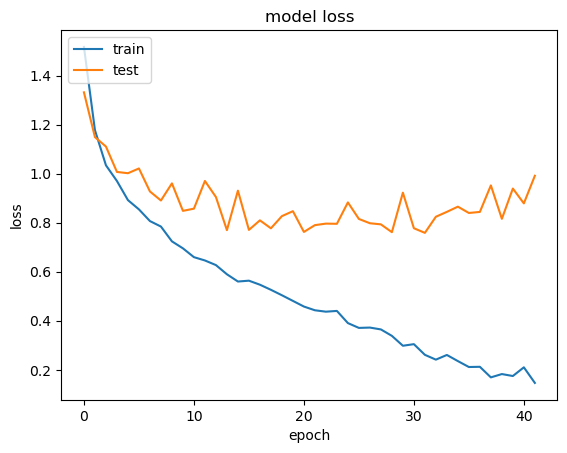

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/student/SER2/saved_models/Emotion_Model.h5 


In [30]:
import keras
from keras.models import model_from_json

# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# Keras optimiser
opt = keras.optimizers.Adam(lr=0.0001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 72.83%


In [31]:
preds = loaded_model.predict(X_test,
                         batch_size=10,
                         verbose=1)

preds=preds.argmax(axis=1)
preds

106/106 [==============================] - 1s 7ms/step


array([4, 5, 3, ..., 1, 4, 5])

In [32]:
# predictions
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf.head()

,actualvalues,predictedvalues
0,neutral,neutral
1,fear,sad
2,happy,happy
3,happy,happy
4,sad,sad


In [33]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,141
disgust,179
fear,140
happy,152
neutral,144
sad,167
surprise,137


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
classes = finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.69      0.77      0.73       126
     disgust       0.72      0.82      0.77       158
        fear       0.81      0.70      0.75       161
       happy       0.73      0.71      0.72       156
     neutral       0.78      0.63      0.70       178
         sad       0.62      0.74      0.67       140
    surprise       0.78      0.76      0.77       141

    accuracy                           0.73      1060
   macro avg       0.73      0.73      0.73      1060
weighted avg       0.74      0.73      0.73      1060



In [36]:
import seaborn as sns

In [37]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
# def gender(row):
#     if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
#         return 'female'
#     elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
#         return 'male'

0.7283018867924528


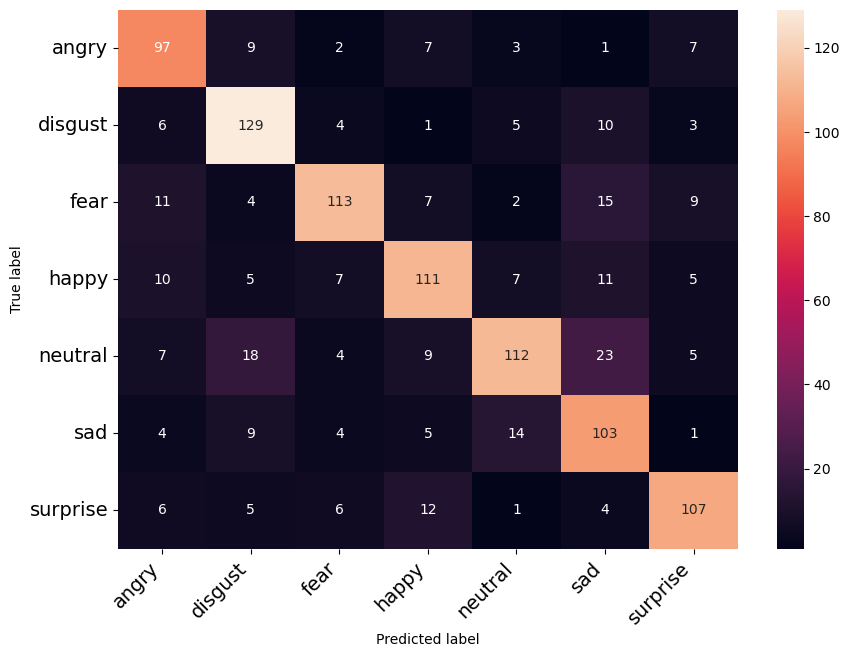

In [47]:
# Get the predictions file
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming X_train_lstm, y_train_one_hot, X_test_lstm, y_test_one_hot are prepared for LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
model_lstm.add(Dropout(0.5))  # Adjust dropout rate
model_lstm.add(LSTM(64))
model_lstm.add(Dense(64, activation='relu'))  # Additional dense layer
model_lstm.add(Dropout(0.5))  # Adjust dropout rate
model_lstm.add(Dense(7, activation='softmax'))  # Target class number

opt_lstm = Adam(lr=0.0001)
model_lstm.summary()

# Compile the LSTM model
model_lstm.compile(loss='categorical_crossentropy', optimizer=opt_lstm, metrics=['accuracy'])

# Early stopping for LSTM
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with early stopping
model_history_lstm = model_lstm.fit(X_train_lstm, y_train_one_hot, batch_size=32, epochs=150, 
                                    validation_data=(X_test_lstm, y_test_one_hot), callbacks=[early_stopping_lstm])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 216, 128)          66560     
                                                                 
 dropout_17 (Dropout)        (None, 216, 128)          0         
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 455       
                                                                 
Total params: 120583 (471.03 KB)
Trainable params: 120

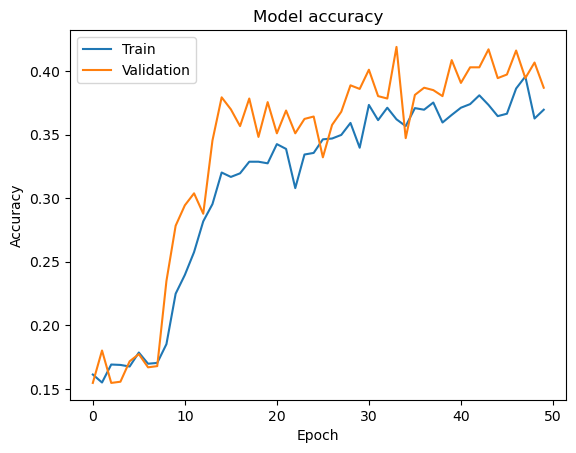

In [52]:
import matplotlib.pyplot as plt

# Assuming model_history_lstm is the history object returned by model.fit()

# Plot training & validation accuracy values
plt.plot(model_history_lstm.history['accuracy'])
plt.plot(model_history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [53]:
# Evaluate the model on the test set
eval_result = model_lstm.evaluate(X_test_lstm, y_test_one_hot)

# Extract the accuracy from the evaluation result
test_accuracy = eval_result[1]

print(f'Test Accuracy: {test_accuracy:.4f}')


34/34 [==============================] - 1s 34ms/step - loss: 1.4244 - accuracy: 0.3868
Test Accuracy: 0.3868


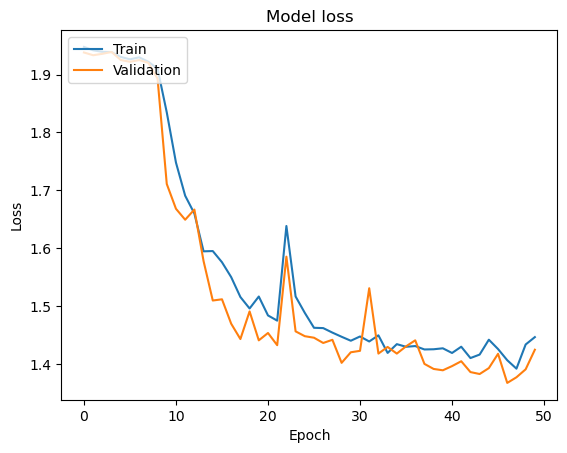

In [54]:
import matplotlib.pyplot as plt

# Assuming model_history_lstm is the history object returned by model.fit()

# Plot training & validation loss values
plt.plot(model_history_lstm.history['loss'])
plt.plot(model_history_lstm.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
